## PROCESSING DATA

In [ ]:
import pandas as pd
import numpy as np

lms = pd.read_csv("/Users/dieciseis/Downloads/Learning_Data_Analyst_Dataset.csv")

In [ ]:
lms.head()

In [ ]:
lms.shape
#150 rows w 24 cols

lms.info()
#"object" base data type that can later be further specified
    #float64 = decimal
    #int54 = integer (whole num)

#output shows completion data, time to completion, actual course time, assessment score, & feedback rating have missing values

In [ ]:
lms.describe() #produces data frame
lms['Training Engagement Score'].describe() #produces series

Steps for Processing Data (Before Analysis)

1. Recode data types (floats to Categoricals) <br>
    a. (Location, Location Type, Training Program, Assignment Type, Content Source, Content Vendor, Completion Status, Delivery Method) <br>
        &nbsp;&nbsp;i. Recode categories to one word (Assignment Type, Content Vendor)
2. Recode date columns (Assignment Date, Due Date, Completion Date)
3. Create 'Days Overdue' Column (Related to NAs)
    a. Script: "if days overdue then 'Completion Date' = 'Due Date'" (should replace 2 NAs)


STEP 1: RECODING COLUMN TYPES TO CATEGORICALS <br>

RECODING INDIVIDUAL COLUMNS:

In [ ]:
#veryfying approach works
cat_cols = lms['Location']
unique_cities = cat_cols.unique()
print(unique_cities)

#RECODING LOCATION
lms['Location'] = lms['Location'].astype('category')

lms.info()
len(lms['Location'].cat.categories)
len(lms['Location'].cat.categories) == len(unique_cities)

In [ ]:
#VERIFYING NUMBER OF CATEGORIES
cat_loctype = lms['Location Type']
unique_loctype =cat_loctype.unique()
print(unique_loctype)

#RECODING LOCATION TYPE
lms['Location Type'] = lms['Location Type'].astype('category')
lms.info()
len(lms['Location Type'].cat.categories) == len(unique_loctype)

In [ ]:
#VERIFYING JOB TYPE CATS
cat_jtype = lms['Job Type']
unique_jtype =cat_jtype.unique()
print(unique_jtype)

lms['Job Type'] = lms['Job Type'].astype('category')
lms.info()
len(lms['Job Type'].cat.categories) == len(unique_jtype)

<br>

RECODING COLUMNS WITH A LOOP

In [ ]:
#CREATING A LOOP FOR CHANGING DATA TYPE
for col in lms.columns:
    if lms[col].dtype == 'object':
        lms[col] = lms[col].astype('category')
    else:
        pass
    print(lms.info())


In [ ]:
#Emplyoee ID was changed by loop; applying original dtype
unique_employee = lms['Employee ID'].unique()
len(unique_employee)

lms['Employee ID'] = lms['Employee ID'].astype('object')
lms.info()

In [ ]:
#RECODING CONTENT SOURCE
unique_manager = lms['Manager ID'].unique()
len(unique_manager)
#KEEP AS CATEGORY

<br>

STEP 1a: RECODING CATEGORY LABELS TO 1 WORD

In [ ]:
lms['Assignment Type'].unique()

lms['Assignment Type'] = lms['Assignment Type'].replace({
    'Assigned by Manager' : 'Manager',
    'Assigned by Self' : 'Self',
    'Assigned by Registrar Desktop' : 'Registrar',
    'Prescriptive Rule' : 'Prescriptive'})

lms['Assignment Type'].unique()

In [ ]:
lms['Content Vendor'].unique()

lms['Content Vendor'] = lms['Content Vendor'].replace({
    'Traliant (Harassment Prevention)' : 'Traliant',
    'Ally Safety (Safety)' : 'Ally Safety',
    'Jeff Havens (Safety)' : 'Jeff Havens',
    'Ninjio (Cyber Security)' : 'Ninjio'})

lms['Content Vendor'].unique()

STEP 2: CHANGING DATA TYPES TO DATE-TIME

In [ ]:
lms['Assignment Date'] = pd.to_datetime(
    lms['Assignment Date'],
    dayfirst=False,
    yearfirst=False,
    format='%m/%d/%y')

print(lms['Assignment Date'].dtype)
print(lms['Assignment Date'].head)

In [ ]:
lms['Due Date'] = pd.to_datetime(
    lms['Due Date'],
    dayfirst=False,
    yearfirst=False,
    format='%m/%d/%y')

print(lms['Due Date'].dtype)
print(lms['Due Date'].head)

In [ ]:
lms['Completion Date'] = pd.to_datetime(
    lms['Completion Date'],
    dayfirst=False,
    yearfirst=False,
    format='%m/%d/%y'
)

print(lms['Completion Date'].dtype)
print(lms['Completion Date'].head)

STEP 3: CREATING DAYS OVERDUE COLUMN

In [ ]:
lms['Days Overdue'] = np.where(
    ((lms['Completion Status'].isin(['Overdue', 'In Progress'])) & (lms['Completion Date'].isna())),
    # completion status either overdue or ip & comp date is missing
    (lms['Due Date'] - lms['Assignment Date']).dt.days,
    #subtract days
    np.where(
        (lms['Completion Date'].notna()) & (lms['Completion Date'] > lms['Due Date']),
        # late if completion date greater than due date
        (lms['Completion Date'] - lms['Due Date']).dt.days,
        # value assigned to late comps
        0
    )
)

(lms['Days Overdue'] == 0).sum()
#matches count in Excel



**DATA IS MISSING AT RANDOM (MAR) AKA MISSINGNESS RELATED TO OBSERVED VARIABLES**

In [ ]:
lms.to_pickle('cleaned_lms.pkl')

<br>

## CREATING OPTIMIZATION MODELS

In [31]:
#descriptives
lms.drop(columns=['Assignment Date', 'Due Date', 'Completion Date']).describe()

,Time to Completion (Days),Completion Rate,Expected Course Time (Minutes),Actual Course Time (Minutes),Assessment Score,Reassignment Count,Training Engagement Score,Training Hours Logged,Cost per Learner,Training Feedback Rating,Days Overdue
count,114.000000,150.000000,150.000000,114.000000,114.000000,150.000000,150.000000,150.000000,150.000000,116.000000,150.000000
mean,22.947368,0.686000,30.980000,35.752193,75.219298,0.080000,5.057733,4.406467,278.770600,3.106897,11.220000
std,19.129666,0.380387,14.528135,16.086172,14.298189,0.338175,2.805093,3.361260,125.030533,1.202731,23.392154
min,0.000000,0.000000,4.000000,7.250000,50.000000,0.000000,0.140000,0.000000,52.260000,1.000000,0.000000
25%,9.000000,0.730000,20.000000,22.000000,62.250000,0.000000,2.785000,1.352500,176.785000,2.100000,0.000000
50%,16.000000,0.850000,30.000000,40.000000,76.000000,0.000000,5.455000,4.275000,292.240000,3.100000,0.000000
75%,32.000000,0.950000,40.000000,45.000000,87.000000,0.000000,7.310000,7.692500,379.847500,4.025000,0.000000
max,77.000000,1.000000,60.000000,65.000000,100.000000,2.000000,9.960000,9.980000,499.220000,5.000000,87.000000


In [35]:
#correlations
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


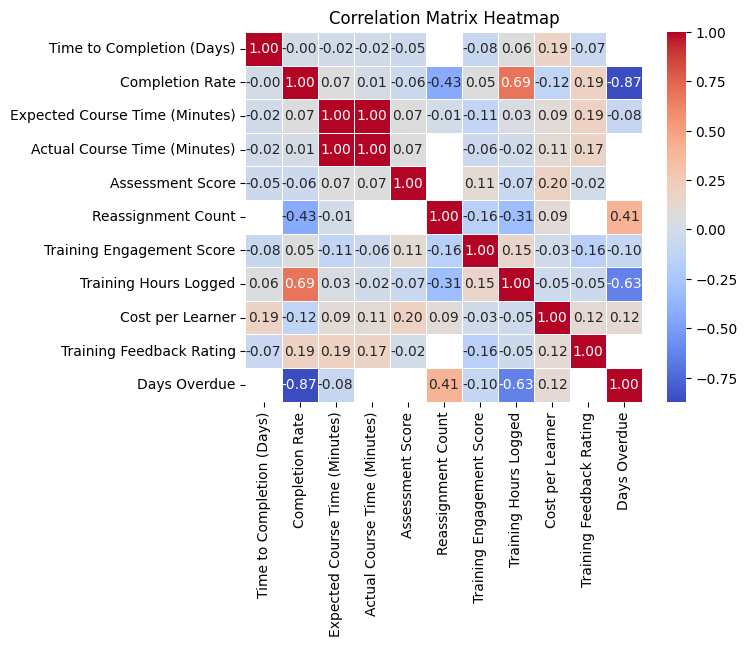

In [39]:
lms_corr = lms.select_dtypes(include=['number']).corr()
sns.heatmap(lms_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Engagement score** is weakly correlated with most variables; largest effect is -0.16 for **Reassignment count** which is 0 for most, highest is 2

**Cost per Learner** and **Assessment Score** moderately correlated (0.2) closely followed by **time to completion**

**Feeback Rating** moderately correlated with **Completion Rate** **Expected Course Time** **Actual Course Time**
<br>Negatively Correlated with **Engagement Score**
    <p>
    </p>
 SO Learners seem to rate longer courses more favorably and complete them at a higher rate
 Longer Courses are more expensive, don't have high engagement scores, and don't influence asssment scores

In [48]:
vendor_summary = lms.groupby("Content Vendor").agg({
    "Assessment Score" : "mean",
    "Training Engagement Score": "mean",
    "Training Feedback Rating" : "mean",
    "Cost per Learner": "mean",
    "Assignment Type": "count",
    "Actual Course Time (Minutes)" : "mean"
}).rename(columns={"Assignment Type": "Assignment Count"}).sort_values("Assignment Count", ascending=False)

In [50]:
vendor_summary

,Assessment Score,Training Engagement Score,Training Feedback Rating,Cost per Learner,Assignment Count,Actual Course Time (Minutes)
Content Vendor,,,,,,
Traliant,71.636364,4.945667,3.068182,297.615000,30,33.181818
Ninjio,73.714286,5.465769,2.871429,241.093462,26,15.607143
Ally Safety,77.750000,5.778500,2.468750,300.173500,20,46.875000
LinkedIn Learning,73.777778,3.806000,3.133333,325.165000,10,38.777778
BizLibrary,78.000000,6.181000,2.916667,218.976000,10,49.166667
Jeff Havens,77.750000,5.171111,3.000000,223.237778,9,44.375000
ACCO Training,72.833333,3.723750,5.000000,295.300000,8,42.000000
Skillsoft,81.166667,4.934286,2.850000,223.124286,7,35.666667
Udemy,73.000000,4.024286,3.680000,286.862857,7,34.400000
